In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [31]:
# Define Functions to use throughout notebook
def do_regression(X,Y):
    regression = linear_model.LinearRegression()
    regression.fit(X,Y)
    print("Coefficients:\n",regression.coef_)
    print("\nIntercept:",regression.intercept_)
    print("\nR^2 Value:",regression.score(X,Y))

def show_skew(X,Y):
    regression = linear_model.LinearRegression()
    regression.fit(X,Y)
    predicted = regression.predict(X).ravel()
    actual = Y
    residual = actual - predicted
    f = plt.figure(figsize=(20,5))
    plt.subplot(131)
    sns.distplot(residual,bins=50)
    plt.title('Residual Counts')
    plt.xlabel('Residual')
    plt.ylabel('Count')
    plt.subplot(132)
    plt.scatter(predicted, residual)
    plt.xlabel('Predicted')
    plt.ylabel('Residual')
    plt.axhline(y=0)
    plt.title('Residual vs. Predicted')
    plt.show()    

In [33]:
# Read in data
df = pd.read_csv('C:\\Users\halln\Desktop\THINKFUL\Datasets\FBI_Table_Drill\data.csv',skiprows=4)

# Drop columns with lots of NA values
df = df.drop(['Rape\n(revised\ndefinition)1','Arson3'],axis=1)

# Then drop other rows with NA values from dataframe
df =df.dropna()

# Collect only needed data into new dataframe with better names
data = pd.DataFrame(df['Population'])
data[['Burglary','Car_Theft','Larceny','Property_Crime']]= df[['Burglary','Motor\nvehicle\ntheft','Larceny-\ntheft','Property\ncrime']]

# Calculate Per Capita values for variables of interest
data['PropCrime_PC'] = data.loc[:,'Property_Crime'] / data.loc[:,'Population']
data['Burglary_PC'] = data.loc[:,'Burglary'] / data.loc[:,'Population']
data['CarTheft_PC'] = data.loc[:,'Car_Theft'] / data.loc[:,'Population']
data['Larceny_PC'] = data.loc[:,'Larceny'] / data.loc[:,'Population']

In [34]:
# Collect variables for Regression and show model 
Y = data['PropCrime_PC']
X = data[['Burglary_PC','CarTheft_PC','Larceny_PC']]
do_regression(X,Y)

Coefficients:
 [1. 1. 1.]

Intercept: -3.469446951953614e-18

R^2 Value: 1.0


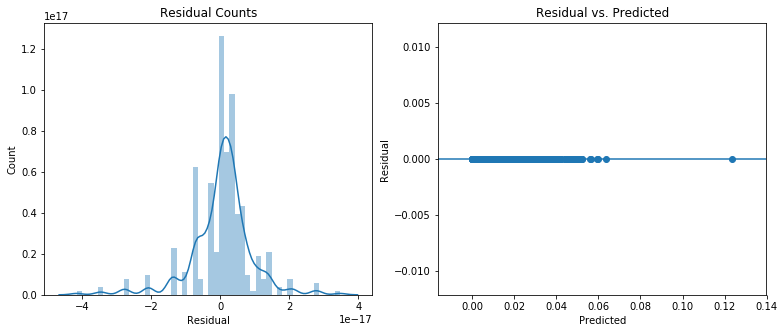

In [35]:
show_skew(X,Y)